## Helper Notebook to Inspect  PNW ML Catalog




- All waveform data downloaded from [IRIS DMC](https://ds.iris.edu/ds/nodes/dmc/).
- Events and phase information are downloaded from [ANSS/ComCat](https://earthquake.usgs.gov/data/comcat/) using [libcomcat](https://github.com/usgs/libcomcat).

- Please download datasets manually from Goole Drive. See link below.
---
 ##### Yiyu Ni (niyiyu@uw.edu)
 ##### Earth and Space Sciences
 ##### University of Washington

In [1]:
# some modules are not intalled in google colab by default.
# !pip install obspy scipy

In [2]:
# ... suppress pandas future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import obspy
import pyasdf
import pandas as pd
import numpy as np

# ... plotting lib
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# ... datetime interaction
from datetime import datetime
from datetime import timedelta as dt
from obspy.core.utcdatetime import UTCDateTime

# ... lib for comcat access
# ... If you work in Google Colab, I coundn't find a way to install libcomcat 
# ... through pip. Please skip this libcomcat part.
#
from libcomcat.dataframes import get_phase_dataframe
from libcomcat.search import get_event_by_id

# ... mount drive through google colab
# 
# from google.colab import drive
# drive.mount('/content/drive')

## Load the PNW dataset
Please download the metadata from Google drive at:
- metadata (metadata.csv ~60MB): https://drive.google.com/file/d/1k1Qp9Anktg2fiZNZpXrilXh53egr-h4B/view?usp=sharing

A IRIS client will be specified to get waveform data. If you are using Google Colab, you can also access the data directly. See two options below.


In [12]:
# ... option 1 (use in a local machine): create an obspy IRIS client and download waveform
client = obspy.clients.fdsn.Client("IRIS")    

# ... option 2 (use in Google Colab):
# path_to_data = './From_EqT/'
# fs = {}
# for year in range(2000, 2021):
#     fs[year] = pyasdf.ASDFDataSet(path_to_data + "waveforms_%d.hdf5" % year, mode = 'r')

# # be sure to check the location of waveforms and metadata

df = pd.read_csv(path_to_data + "metadata.csv")
df.insert(0, "index", range(len(df)))
df

,index,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_magnitude,station_network_code,trace_channel,station_code,station_location_code,trace_sampling_rate_hz,trace_start_time,trace_UW_P_arrival_time,trace_UW_S_arrival_time,trace_ML_P_arrival_time,trace_ML_S_arrival_time
0,0,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,NAC,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,NaN
1,1,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,GHW,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,NaN
2,2,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,BOW,NaN,NaN,9.782860e+08,9.782861e+08,NaN,NaN,9.782861e+08
3,3,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,EPH,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,9.782861e+08
4,4,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,GSM,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,9.782861e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425925,425925,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,CC,BHZ,PANH,NaN,NaN,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09
425926,425926,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,UW,EHZ,LO2,NaN,NaN,1.577850e+09,1.577850e+09,NaN,1.577850e+09,1.577850e+09
425927,425927,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,UW,HHN,LON,NaN,NaN,1.577850e+09,NaN,1.577850e+09,1.577850e+09,1.577850e+09
425928,425928,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,CC,BHZ,PR05,NaN,NaN,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09


## Do some stream selection only if necessary

In [6]:
df_filt = df

# df_filt = df_filt[df_filt['source_id'] == 'uw61631152']      # select a source id
# df_filt = df_filt[df_filt['source_magnitude'] >= 5]          # select filter out magnitude
# df_filt = df_filt[df_filt['station_network_code'] == 'UW']   # select network code
# df_filt = df_filt[df_filt['station_code'] == 'VLL']          # select station code

df_filt

,index,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_magnitude,station_network_code,trace_channel,station_code,station_location_code,trace_sampling_rate_hz,trace_start_time,trace_UW_P_arrival_time,trace_UW_S_arrival_time,trace_ML_P_arrival_time,trace_ML_S_arrival_time
0,0,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,NAC,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,NaN
1,1,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,GHW,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,NaN
2,2,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,BOW,NaN,NaN,9.782860e+08,9.782861e+08,NaN,NaN,9.782861e+08
3,3,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,EPH,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,9.782861e+08
4,4,uw10518118,2000-12-31T18:07:44.830000Z,47.505667,-121.668667,2.90,UW,EHZ,GSM,NaN,NaN,9.782860e+08,9.782861e+08,NaN,9.782861e+08,9.782861e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425925,425925,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,CC,BHZ,PANH,NaN,NaN,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09
425926,425926,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,UW,EHZ,LO2,NaN,NaN,1.577850e+09,1.577850e+09,NaN,1.577850e+09,1.577850e+09
425927,425927,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,UW,HHN,LON,NaN,NaN,1.577850e+09,NaN,1.577850e+09,1.577850e+09,1.577850e+09
425928,425928,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.97,CC,BHZ,PR05,NaN,NaN,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09,1.577850e+09


## Specify an index by looking at the "index" column of filtered dataframe

In [7]:
# specify a index:
# index = 38082

# ... or randomly look at all data set:
index = np.random.randint(185307)

df.iloc[index]

index                                            70253
source_id                                   uw10603943
source_origin_time         2004-02-28T02:01:47.930000Z
source_latitude_deg                          46.036333
source_longitude_deg                         -119.0205
source_magnitude                                   3.3
station_network_code                                UW
trace_channel                                      EHZ
station_code                                       WA2
station_location_code                              NaN
trace_sampling_rate_hz                             NaN
trace_start_time                         1077933687.93
trace_UW_P_arrival_time                  1077933724.93
trace_UW_S_arrival_time                            NaN
trace_ML_P_arrival_time                  1077933725.21
trace_ML_S_arrival_time                            NaN
Name: 70253, dtype: object

## Interactive with streams
**Note that interactive plotting is not available at Google Colab**

<IPython.core.display.Javascript object>


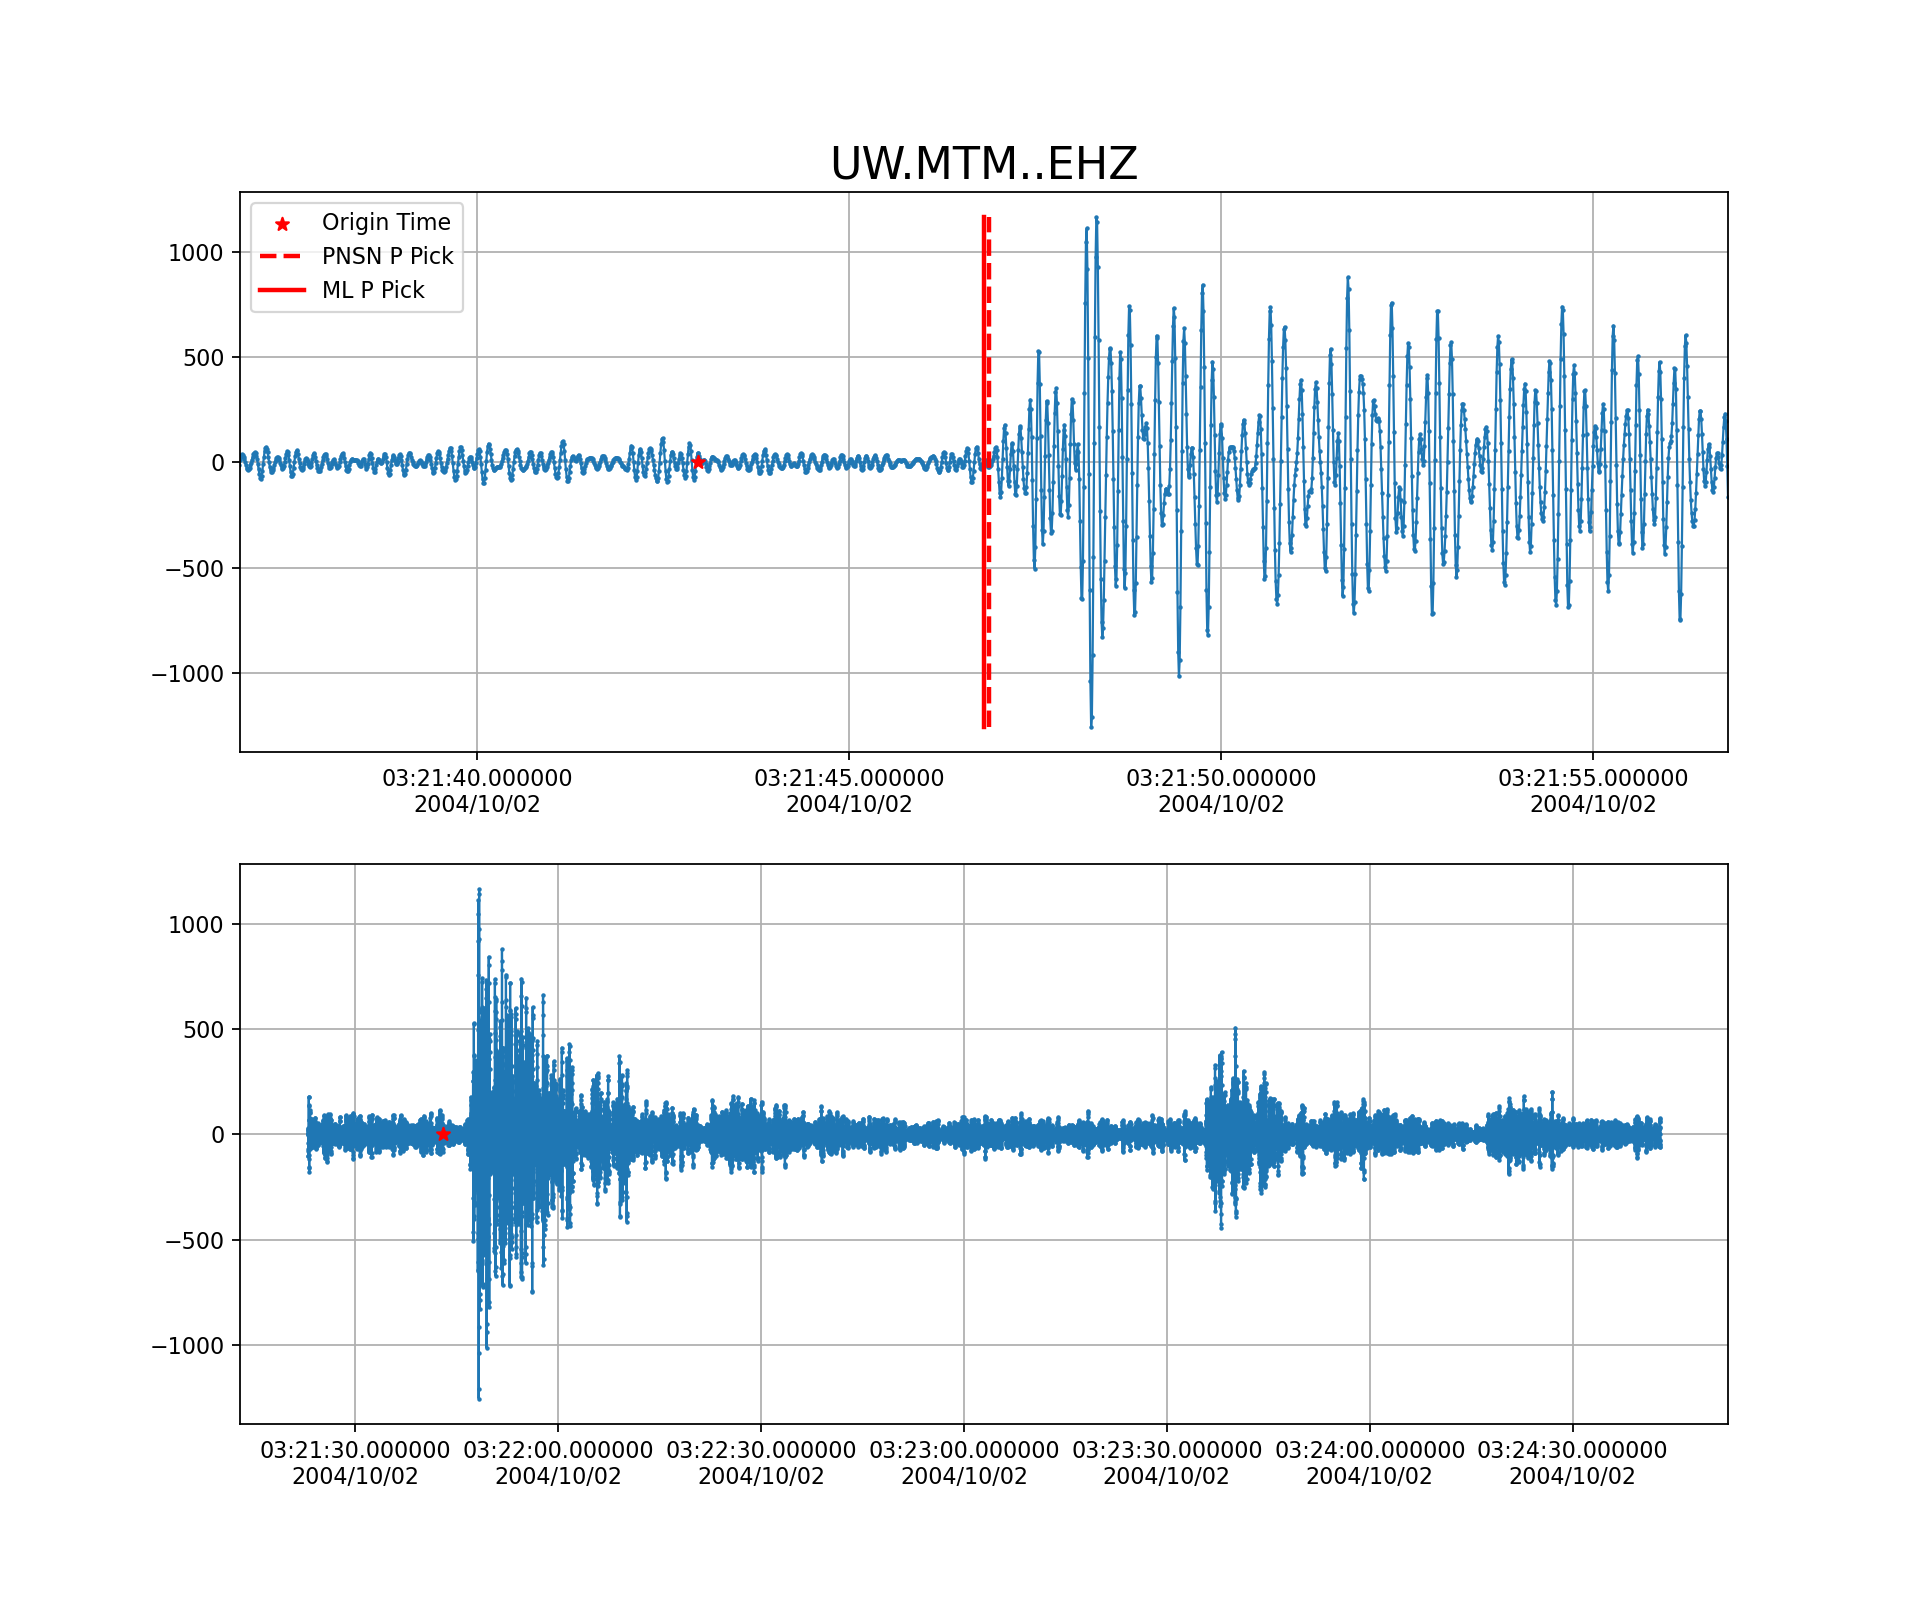

In [13]:
%matplotlib notebook

index = np.random.randint(425930)

# ...pass the IRIS client (pretty fast)
interactive_plotting(df, index, seconds_before = 10, seconds_after = 10,
    apply_filter = 'bandpass',  freqmax = 10, freqmin = 5, client = client)

# ...or file handles
# interactive_plotting(df, index, seconds_before = 10, seconds_after = 10,
#     apply_filter = 'lowpass',  freq = 10, fs = fs)

<IPython.core.display.Javascript object>


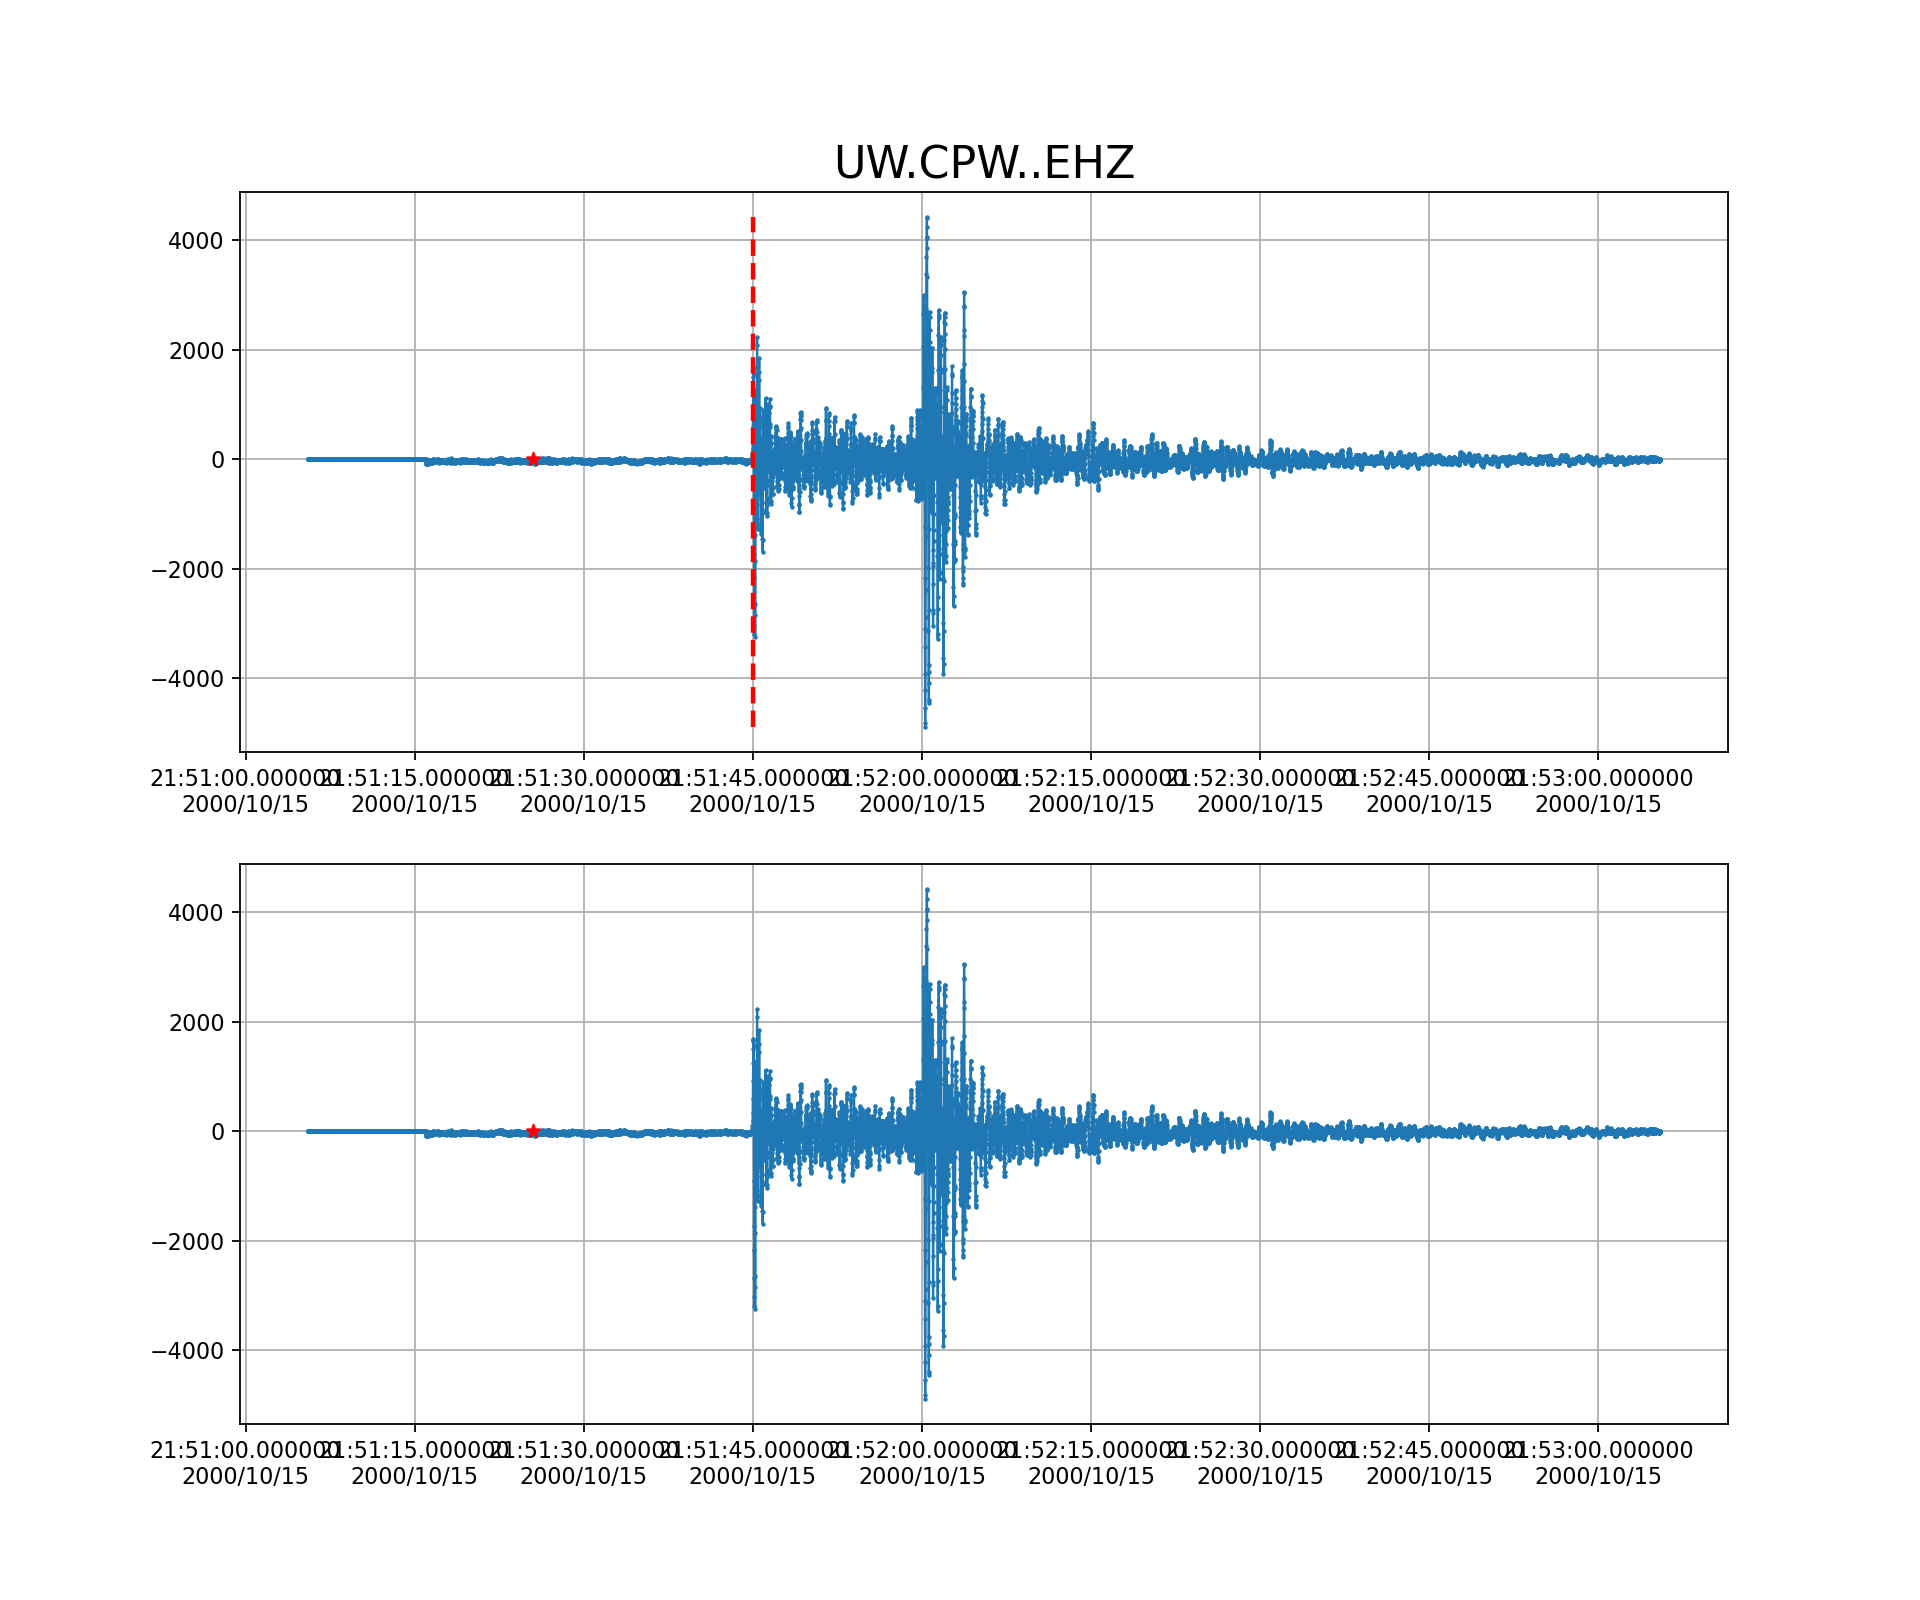

NameError: name 'seconds_before' is not defined

In [28]:
source_id = df.iloc[index]['source_id']
net = df.iloc[index]['station_network_code']
sta = df.iloc[index]['station_code']
loc =  df.iloc[index]['station_location_code']
cha = df.iloc[index]['trace_channel']
trace_starttime = df.iloc[index]['trace_start_time']
sta = df.iloc[index]['station_code']
net = df.iloc[index]['station_network_code']
otime = df.iloc[index]['source_origin_time']
source_origin_time = UTCDateTime(otime)
year = source_origin_time.year
starttime = datetime.utcfromtimestamp(UTCDateTime(trace_starttime).timestamp)
stream = fs[year].waveforms["%s_%s" % (net, sta)].prediction.trim(starttime = source_origin_time - 20, 
                                                  endtime = source_origin_time + 100)
sample_rate = 100
data = np.array(stream)
x = [starttime + dt(seconds = i/sample_rate) for i in np.arange(data.shape[-1])]

plt.figure(figsize = (12, 10), dpi = 80)
plt.subplots_adjust(hspace = 0.2)
plt.subplot(2, 1, 1)
plt.title("%s.%s..%s" % (net, sta, cha), fontsize = 20)
plt.plot(x, np.array(stream).T, '.-', markersize = 2, linewidth = 1)
plt.grid(True)
myFmt = mdates.DateFormatter('%X.%f\n%Y/%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.scatter([source_origin_time], [0], marker = '*', color = 'r', zorder = 90, label = "Origin Time")

plt.subplot(2, 1, 2)
plt.plot(x, np.array(stream).T, '.-', markersize = 2, linewidth = 1)
plt.grid(True)
myFmt = mdates.DateFormatter('%X.%f\n%Y/%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.scatter([source_origin_time], [0], marker = '*', color = 'r', zorder = 90, label = "Origin Time")

if pd.notnull(df.iloc[index]['trace_UW_P_arrival_time']):
    plt.subplot(2, 1, 1)
    p_time = [(starttime + dt(seconds = df.iloc[index]['trace_UW_P_arrival_time'] - trace_starttime)) for _ in range(10)]
    plt.plot(p_time, np.linspace(data.min(), data.max(), 10), 
         'r--', label = 'PNSN P Pick', linewidth = 2)
    plt.xlim([p_time[0] - dt(seconds = seconds_before),  
          p_time[0] + dt(seconds = seconds_after)])   # Only look at seconds before/after arrival
    plt.legend()

if pd.notnull(df.iloc[index]['trace_UW_S_arrival_time']):
    plt.subplot(2, 1, 2)
    s_time = [(starttime + dt(seconds = df.iloc[index]['trace_UW_S_arrival_time'] - trace_starttime)) for _ in range(10)]
    plt.plot(s_time, np.linspace(data.min(), data.max(), 10), 
         'k--', label = 'PNSN S Pick', linewidth = 2)
    plt.xlim([s_time[0] - dt(seconds = seconds_before),  
          s_time[0] + dt(seconds = seconds_after)])   # Only look at seconds before/after arrival
    plt.legend()

if pd.notnull(df.iloc[index]['trace_ML_P_arrival_time']):
    plt.subplot(2, 1, 1)
    p_time = [(starttime + dt(seconds = df.iloc[index]['trace_ML_P_arrival_time'] - trace_starttime)) for _ in range(10)]
    plt.plot(p_time, np.linspace(data.min(), data.max(), 10), 
         'r', label = 'ML P Pick', linewidth = 2)
    plt.xlim([p_time[0] - dt(seconds = seconds_before),  
          p_time[0] + dt(seconds = seconds_after)])   # Only look at seconds before/after arrival
    plt.legend()

if pd.notnull(df.iloc[index]['trace_ML_S_arrival_time']):
    plt.subplot(2, 1, 2)
    s_time = [(starttime + dt(seconds = df.iloc[index]['trace_ML_S_arrival_time'] - trace_starttime)) for _ in range(10)]
    plt.plot(s_time, np.linspace(data.min(), data.max(), 10), 
         'k', label = 'ML S Pick', linewidth = 2)
    plt.xlim([s_time[0] - dt(seconds = seconds_before),  
          s_time[0] + dt(seconds = seconds_after)])   # Only look at seconds before/after arrival
    plt.legend()

## Use ComCat Python interface to check the arrivals from ANSS
**Note that libcomcat is not available at Google Colab**

In [221]:
source_id = df.iloc[index]['source_id']
detail = get_event_by_id(source_id, includesuperseded=False)
df_cc = get_phase_dataframe(detail, catalog='uw')
df_cc[df_cc['Channel'].str.contains(df.iloc[index]['station_code'])]

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Agency
70,UW.ELL.EHZ.,0.981,124.4,P,2000-07-31 03:13:08.840000,manual,0.13,1.0,UW
71,UW.ELL.EHZ.,0.981,124.4,S,2000-07-31 03:13:23.120000,manual,0.32,1.0,UW
